## Predicting the sales of a retail store based on advertising spend across different channels (TV, radio, newspaper)




Project Outline

1. Data Collection:


We'll use the "Advertising" dataset, which is often used for this type of analysis. It contains data on advertising spend in TV, radio, and newspapers, along with the corresponding sales.

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('Advertising.csv')
#df.head() # Testing data with head()

step 2. Data Preparation

1. Load the Data: Import the dataset using pandas.

2. Explore the Data: Understand the structure, types of features, and check for missing values.

3.Clean the Data: Handle any missing values, encode categorical variables if necessary, and normalize numerical features if required.

In [24]:
# Check for missing values
print(df.isnull().sum())
# Summary statistics
print(df.describe())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


Step 3. Exploratory Data Analysis (EDA)

1. Visualize Relationships: Use plots to visualize the relationship between advertising spend and sales.

3. Correlation Analysis: Check the correlation between different features and the target variable.

In [25]:
# Exploratory Data Analysis - EDA
import seaborn as sns
import matplotlib.pyplot as plt

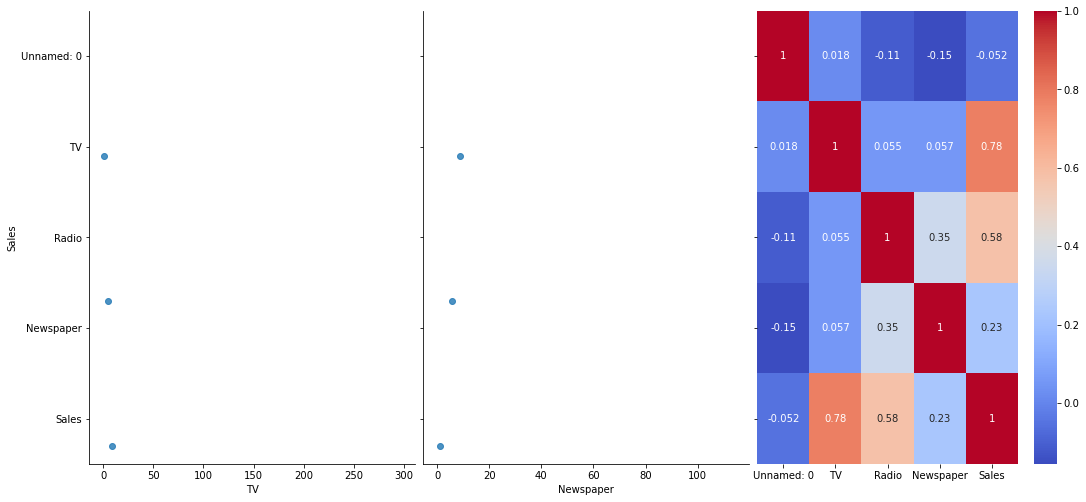

In [26]:
sns.pairplot(df, x_vars= ['TV','Newspaper','Radio'], y_vars = ['Sales'], height = 7 , aspect = 0.7, kind = 'reg')
corr_matrix  = df .corr()
sns.heatmap(corr_matrix, annot = True,  cmap = 'coolwarm')
plt.show()

step 4. Feature Selection
1. Select Features: Choose the most relevant features for predicting sales.
2. Create Training and Test Sets: Split the data into training and test sets.

In [32]:
x = df[['TV', 'Newspaper', 'Radio']]
y = df['Sales']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)


Step 5. Building the Model

1. Import Libraries: Use libraries like scikit-learn to create the model.
2. Train the Model: Fit the linear regression model on the training data.
3. Evaluate the Model: Use metrics like R-squared and Mean Squared Error (MSE) to evaluate the model.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Model building
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [38]:
# Evaluating the model 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error for test set',mse)
print('R-squared score for test set',r2)

Mean Squared Error for test set 2.2987166978863787
R-squared score for test set 0.9185780903322445


Step 6. Model Tuning

1. Hyperparameter Tuning: Experiment with adding polynomial features or interaction terms.

2. Cross-Validation: Use cross-validation to ensure the model's robustness.

In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error for test set',mae)

Mean Absolute Error for test set 1.213745773614481


In [56]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Create the model
model_poly = LinearRegression()

# Train the model
model_poly.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (Polynomial Features): {mse_poly}')
print(f'R-squared (Polynomial Features): {r2_poly}')


Mean Squared Error (Polynomial Features): 0.44175055104032684
R-squared (Polynomial Features): 0.98435293331468


step 7. Model Deployment

1. Save the Model: Save the trained model for future use.
2. Create Predictions: Use the model to make predictions on new data.

In [64]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_squared_error')
mse_score = -scores

print(f'cross validation scores: {mse_score}±{mse_score.std()}')

r2_scores = cross_val_score(model, x, y, cv = 5, scoring = 'r2')
print(f'cross validation scores: {r2_scores}±{r2_scores.std()}')


cross validation scores: [3.1365399  2.42566776 1.58522508 5.42615506 2.79114519]±1.2847825826540034
cross validation scores: [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]±0.04034052587780585


In [76]:
import joblib

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')

# Load the model (for future use)
loaded_model = joblib.load('linear_regression_model.pkl')

# Create new predictions
new_predictions = loaded_model.predict(x_test)


In [79]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame to display actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': new_predictions})

# Calculate evaluation metrics
mse = mean_squared_error(y_test, new_predictions)
r2 = r2_score(y_test, new_predictions)

# Display the first few rows of the results
print(results_df.head())

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


     Actual  Predicted
37     14.7  15.741313
109    19.8  19.610626
31     11.9  11.448889
89     16.7  17.008198
66      9.5   9.172857
Mean Squared Error: 2.2987166978863787
R-squared: 0.9185780903322445


### Summary
##### 1. Polynomial Features: Make sure that polynomial features are created using fit_transform on the training set and transform on the test set.
##### 2. Evaluation: Use metrics like MSE and R-squared to evaluate both the base model and the polynomial model.
##### 3. Cross-Validation: Validate the model's performance using cross-validation.
##### 4. Deployment: Save and load the model for future use.